In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/2023데청캠/프로젝트/archive (1).zip' -d /content/drive/MyDrive/2023데청캠/프로젝트

unzip:  cannot find or open /content/drive/MyDrive/2023데청캠/프로젝트/archive (1).zip, /content/drive/MyDrive/2023데청캠/프로젝트/archive (1).zip.zip or /content/drive/MyDrive/2023데청캠/프로젝트/archive (1).zip.ZIP.


In [83]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import random
import sklearn
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
#모디 인도총리에 관한 트윗... 경제 관련 트윗을 들고오면 좋겠는데 이건 좀 정치 쪽임
df=pd.read_csv("/content/drive/MyDrive/2023데청캠/프로젝트/Twitter_Data.csv")

##데이터셋 전처리

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
df=df.dropna()

In [86]:
doc=[]
for sentence in df['clean_text']:
  doc.append(sentence)

In [87]:
docs=[]
for i in range(len(doc)):
  sentence=doc[i]
  sentence=re.sub("[^a-zA-Z]"," ", str(sentence)).lower()
  while "  " in sentence:
    sentence = sentence.replace("  ", " ")

  doc[i]=sentence

In [88]:
df['text']=doc

In [89]:
tokenizer1=Tokenizer()
tokenizer1.fit_on_texts(df['text'])
print(len(tokenizer1.word_index))

encoded=tokenizer1.texts_to_sequences(df['text'])

100664


In [ ]:
# l = pd.Series(encoded)

# import seaborn as sns
# # 단어 사전 분포도 확인
# plt.figure(figsize=(12, 9))
# sns.histplot(l)

In [90]:
word2index=tokenizer1.word_index
index2word={value: key for key, value in word2index.items()}


###패딩

In [91]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# row의 최대 list 길이를 140
max_length = 140

pad_text = pad_sequences(encoded, maxlen=max_length)
# pad_text[:5]

In [92]:
min1_df={}
min1_df=df[:2000]
min1_df

,clean_text,category,text
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...
...,...,...,...
1996,modi meetings andhra pradesh march april modi ...,0.0,modi meetings andhra pradesh march april modi ...
1997,one vote can make all the difference anil kapo...,1.0,one vote can make all the difference anil kapo...
1998,yes want see this movie great narendra modi,1.0,yes want see this movie great narendra modi
1999,documents reveal modi and javadekars war india...,1.0,documents reveal modi and javadekars war india...


In [93]:
temp=(min1_df['category']+1).to_numpy()
temp[:5]


array([0., 1., 2., 2., 2.])

In [94]:
min1_df.dtypes

clean_text     object
category      float64
text           object
dtype: object

##모델  
주제 요약도 필요하고 감성분석도 필요함...

In [95]:
import numpy as np
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Bidirectional, LSTM, Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import load_model

In [111]:
VOCAB_SIZE = len(tokenizer1.word_index)+1 # 패딩 0때문에 사이즈 하나 큼
EMBEDDING_DIM = 300
INPUT_LENGTH = max_length #140

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=INPUT_LENGTH))

model.add(Normalization())
#model.add(Dropout(0.25))
model.add(LSTM(128,activation='tanh', recurrent_dropout=0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [112]:
from tensorflow.keras.optimizers import Adam,RMSprop
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer=optimizers, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [114]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5)
model_ckpt=ModelCheckpoint('/content/drive/MyDrive/2023데청캠/프로젝트/tweet_model.h5',save_best_only=True)

####구글 pre-trained가져오기

In [ ]:
#pre_trained
!pip install gensim
from gensim.models import KeyedVectors


In [ ]:
from gensim.models import KeyedVectors

# 구글 뉴스 Word2Vec 모델을 다운로드합니다.
# 다운로드에 시간이 오래 걸릴 수 있습니다. 구글 드라이브에서 다운로드합니다.

# 다운로드된 파일을 로드합니다.
word2vec_path =
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


--2023-07-20 04:53:19--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.204.152, 52.216.222.64, 54.231.168.16, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.204.152|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-20 04:53:19 ERROR 404: Not Found.



HTTPError: ignored

In [ ]:
import numpy as np
#필요한 단어만 추출
VOCAB_SIZE = len(tokenizer1.index_word) + 1
EMBEDDING_DIM = 300

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

# tokenizer에 있는 단어 사전을 순회하면서 word2vec의 300차원 vector를 가져옵니다
for word, idx in tokenizer1.word_index.items():
    embedding_vector = word2vec[word] if word in word2vec else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
#확인
embedding_matrix.shape

In [ ]:
#이러고

#이렇게 바꿔주면 됨


model = Sequential()
# 바로 이곳에 들어가는 Embedding Layer가 단어에 대하여 설정한 차원으로 변환해줍니다.
model.add(Embedding(VOCAB_SIZE,
                    EMBEDDING_DIM,
                    input_length=INPUT_LENGTH,
                    weights=[embedding_matrix], # weight는 바로 위의 embedding_matrix 대입
                    trainable=False # embedding layer에 대한 train은 꼭 false로 지정
                   )
         )
#여기도 드롭아웃 할 수, 양방향
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))

###fit,split

In [99]:
df.isnull().any()

clean_text    False
category      False
text          False
dtype: bool

In [100]:
pad_text = pad_text.astype(float)

In [101]:
pad_text.dtype

dtype('float64')

In [113]:
from sklearn.model_selection import train_test_split
#min_df=df.loc[:2000]
x_train, x_valid, y_train, y_valid = train_test_split(pad_text[:2000],
 temp,
test_size=0.2,
random_state=30
 )


In [ ]:
print(x_train.dtype,y_train.dtype)


float64 float64


In [109]:
#저장된 모델 로드
model=load_model('/content/drive/MyDrive/2023데청캠/프로젝트/tweet_model.h5')

In [115]:
history=model.fit(x_train, y_train, batch_size=32, epochs=20,
 validation_data = (x_valid,y_valid),
callbacks = [model_ckpt, early_stopping_callback])

Epoch 1/20
50/50 [==============================] - 68s 1s/step - loss: 1.0862 - accuracy: 0.4206 - val_loss: 1.0411 - val_accuracy: 0.4450
Epoch 2/20
50/50 [==============================] - 73s 1s/step - loss: 1.0275 - accuracy: 0.4869 - val_loss: 0.9821 - val_accuracy: 0.5400
Epoch 3/20
50/50 [==============================] - 71s 1s/step - loss: 1.0026 - accuracy: 0.5169 - val_loss: 0.9525 - val_accuracy: 0.5575
Epoch 4/20
50/50 [==============================] - 71s 1s/step - loss: 0.9717 - accuracy: 0.5231 - val_loss: 0.9331 - val_accuracy: 0.5625
Epoch 5/20
50/50 [==============================] - 74s 1s/step - loss: 0.9381 - accuracy: 0.5469 - val_loss: 0.8978 - val_accuracy: 0.5725
Epoch 6/20
50/50 [==============================] - 75s 2s/step - loss: 0.8862 - accuracy: 0.5744 - val_loss: 0.8733 - val_accuracy: 0.5800
Epoch 7/20
50/50 [==============================] - 67s 1s/step - loss: 0.7981 - accuracy: 0.6212 - val_loss: 0.8455 - val_accuracy: 0.6125
Epoch 8/20
50/50 [==

##일론

In [ ]:
e_df=pd.read_csv("/content/drive/MyDrive/2023데청캠/프로젝트/elonmusk.csv")

In [ ]:
e_df=e_df.loc[:,['Datetime','Text']]
e_df['Datetime']=pd.to_datetime(e_df['Datetime'])
e_df['Date']=e_df['Datetime'].dt.date
e_df=e_df.dropna()

In [ ]:
doc=[]
for sentence in e_df['Text']:
  doc.append(sentence)

In [ ]:
docs=[]
for i in range(len(doc)):
  sentence=doc[i]
  sentence=re.sub("@(\w{1,}) "," ", str(sentence)).lower() #언급 아이디 형식 #@~
  sentence=re.sub("[^a-zA-Z]"," ", str(sentence)).lower()
  while "  " in sentence:
    sentence = sentence.replace("  ", " ")

  doc[i]=sentence

In [ ]:
e_df['text']=doc
e_df#2010-06-04-#2023-06-29

,Datetime,Text,Date,text
0,2023-06-29 16:20:19+00:00,@mwseibel Yup,2023-06-29,yup
1,2023-06-29 15:53:52+00:00,@TitterDaily True,2023-06-29,true
2,2023-06-29 03:46:37+00:00,@paulg Generational trauma. An example of why ...,2023-06-29,generational trauma an example of why forgive...
3,2023-06-29 01:19:59+00:00,Improved longform posts,2023-06-29,improved longform posts
4,2023-06-28 18:05:58+00:00,@BillyM2k Best protip ever,2023-06-28,best protip ever
...,...,...,...,...
24445,2011-12-03 08:22:07+00:00,That was a total non sequitur btw,2011-12-03,that was a total non sequitur btw
24446,2011-12-03 08:20:28+00:00,"Great Voltaire quote, arguably better than Twa...",2011-12-03,great voltaire quote arguably better than twai...
24447,2011-12-01 10:29:04+00:00,I made the volume on the Model S http://t.co/w...,2011-12-01,i made the volume on the model s http t co wmc...
24448,2011-12-01 09:55:11+00:00,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01,went to iceland on sat to ride bumper cars on ...


In [ ]:
#기존 토크나이저에 추가 학습 진행, 이럴거면 이거를 앞으로 빼서 다시 원문에 적용하고 다시 임베딩 시켜야함
# tokenizer1.fit_on_texts(e_df['text'])
print(len(tokenizer1.word_index))

e_text=tokenizer1.texts_to_sequences(e_df['text'])

100664


In [ ]:
e_word2index=tokenizer1.word_index
e_index2word={value: key for key, value in word2index.items()}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# row의 최대 list 길이를 500으로 제한
max_length = 140#최대 140자니까 단어면 더 짧기야 하겠지만...

e_input_text = pad_sequences(e_text, maxlen=max_length)
e_input_text[:5]

In [ ]:
score=model.predict(e_input_text)
e_df['nscore']=score[:,0]
e_df['mscore']=score[:,1]
e_df['pscore']=score[:,2]

765/765 [==============================] - 32s 42ms/step


In [ ]:
score

array([[8.4939267e-04, 9.9823976e-01, 9.1078528e-04],
       [1.2118363e-01, 3.8832203e-01, 4.9049434e-01],
       [3.3931732e-02, 5.2709057e-04, 9.6554112e-01],
       ...,
       [2.0791146e-01, 7.1350761e-02, 7.2073781e-01],
       [8.1216455e-01, 2.5734403e-03, 1.8526205e-01],
       [8.4712259e-02, 8.9268661e-01, 2.2601184e-02]], dtype=float32)

In [ ]:
e_df['nscore']=score[:,0]
e_df['mscore']=score[:,1]
e_df['pscore']=score[:,2]

In [ ]:
score[:,2]

array([9.1078528e-04, 4.9049434e-01, 9.6554112e-01, ..., 7.2073781e-01,
       1.8526205e-01, 2.2601184e-02], dtype=float32)

In [ ]:
e_score=pd.DataFrame()
e_score['Date']=e_df['Date']
e_score['nscore']=e_df['nscore']
e_score['pscore']=e_df['pscore']

e_score

,Date,nscore,pscore
0,2023-06-29,0.000849,0.000911
1,2023-06-29,0.121184,0.490494
2,2023-06-29,0.033932,0.965541
3,2023-06-29,0.000590,0.000492
4,2023-06-28,0.004966,0.989513
...,...,...,...
24445,2011-12-03,0.787616,0.030847
24446,2011-12-03,0.000002,0.999997
24447,2011-12-01,0.207911,0.720738
24448,2011-12-01,0.812165,0.185262


In [ ]:
e_score.to_csv('/content/drive/MyDrive/2023데청캠/프로젝트/elonmusk_score.csv')

##테슬라

In [7]:
import pandas as pd

In [3]:
t_stock=pd.read_csv('/content/drive/MyDrive/2023데청캠/프로젝트/TSLA.csv')
e_score=pd.read_csv('/content/drive/MyDrive/2023데청캠/프로젝트/elonmusk_score.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

,Date,diff
0,2010-06-29,NaN
1,2010-06-30,-0.012000
2,2010-07-01,-0.374000
3,2010-07-02,-0.552000
4,2010-07-06,-0.618000
...,...,...
2951,2022-03-18,33.790039
2952,2022-03-21,15.769958
2953,2022-03-22,72.820007
2954,2022-03-23,5.130005


In [8]:

t_stock['diff']=t_stock['Close'].diff()
t_stock=t_stock.loc[:,['Date','diff']]
t_stock['Date']=pd.to_datetime(t_stock['Date'])

e_score['Date']=pd.to_datetime(e_score['Date'])

In [9]:
t_stock.dropna()

,Date,diff
1,2010-06-30,-0.012000
2,2010-07-01,-0.374000
3,2010-07-02,-0.552000
4,2010-07-06,-0.618000
5,2010-07-07,-0.062000
...,...,...
2951,2022-03-18,33.790039
2952,2022-03-21,15.769958
2953,2022-03-22,72.820007
2954,2022-03-23,5.130005


In [ ]:
e_score

In [125]:
dfx = pd.merge(e_score, t_stock, on='Date', how='inner')

In [126]:
dfx

,Unnamed: 0,Date,nscore,pscore,diff
0,9511,2022-03-24,0.012852,0.963178,14.809998
1,9512,2022-03-24,0.019064,0.980426,14.809998
2,9513,2022-03-24,0.001255,0.001515,14.809998
3,9514,2022-03-24,0.777368,0.016634,14.809998
4,9515,2022-03-24,0.000731,0.000860,14.809998
...,...,...,...,...,...
10347,24441,2011-12-21,0.118837,0.877802,-0.066000
10348,24442,2011-12-21,0.002992,0.996820,-0.066000
10349,24443,2011-12-21,0.000014,0.999985,-0.066000
10350,24447,2011-12-01,0.207911,0.720738,-0.028000


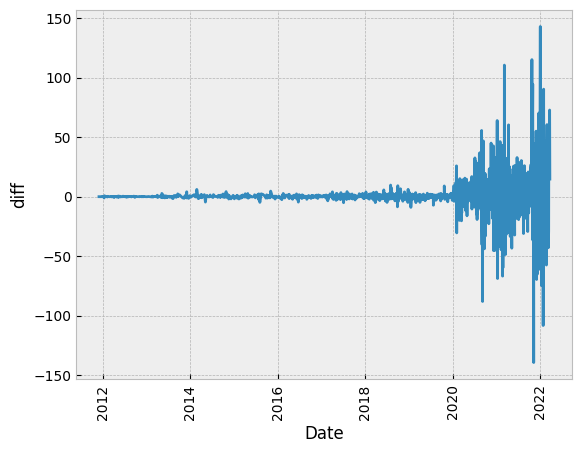

In [11]:
plt.style.use('bmh')
sns.lineplot(data=dfx,x='Date',y='diff')
plt.xticks(rotation = 90)



plt.show()

In [42]:
dfx

,Unnamed: 0,Date,nscore,pscore,diff
0,9511,2022-03-24,0.012852,0.963178,14.809998
1,9512,2022-03-24,0.019064,0.980426,14.809998
2,9513,2022-03-24,0.001255,0.001515,14.809998
3,9514,2022-03-24,0.777368,0.016634,14.809998
4,9515,2022-03-24,0.000731,0.000860,14.809998
...,...,...,...,...,...
10347,24441,2011-12-21,0.118837,0.877802,-0.066000
10348,24442,2011-12-21,0.002992,0.996820,-0.066000
10349,24443,2011-12-21,0.000014,0.999985,-0.066000
10350,24447,2011-12-01,0.207911,0.720738,-0.028000


In [5]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [129]:
df1=dfx[dfx['Date']<'2013-04-01']
df2=dfx[(dfx['Date']>='2013-04-01')&(dfx['Date']<'2020-01-01')]
df3=dfx[dfx['Date']>'2020-01-01']

In [130]:
scaler = StandardScaler()
df1['diff'] = scaler.fit_transform(df1['diff'].values.reshape(-1, 1))
df2['diff'] = scaler.fit_transform(df2['diff'].values.reshape(-1, 1))
df3['diff'] = scaler.fit_transform(df3['diff'].values.reshape(-1, 1))

<ipython-input-130-6c6fc5f8d36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff'] = scaler.fit_transform(df1['diff'].values.reshape(-1, 1))
<ipython-input-130-6c6fc5f8d36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diff'] = scaler.fit_transform(df2['diff'].values.reshape(-1, 1))
<ipython-input-130-6c6fc5f8d36a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [131]:
dfx=pd.concat([df1,df2,df3])

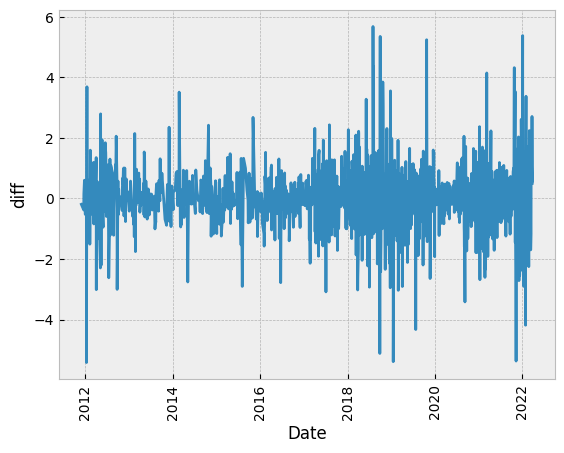

In [175]:
plt.style.use('bmh')
sns.lineplot(data=dfx,x='Date',y='diff')
plt.xticks(rotation = 90)



plt.show()

In [74]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [138]:
x=dfx[['nscore','pscore']]
y=dfx['diff'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

###모델

In [173]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 정의
model = RandomForestRegressor(n_estimators=1000,min_samples_split=2, random_state=42)

model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [167]:
y_pred1

array([ 0.00937613, -0.07427817,  0.01973477, ..., -0.01418993,
       -0.01407814,  0.00414669])

In [166]:
y_pred=model.predict(x_test)

In [161]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.2303772527045878
R-squared (R2): -0.1478045070231242


In [162]:
y_t_pred=model.predict(x_train)

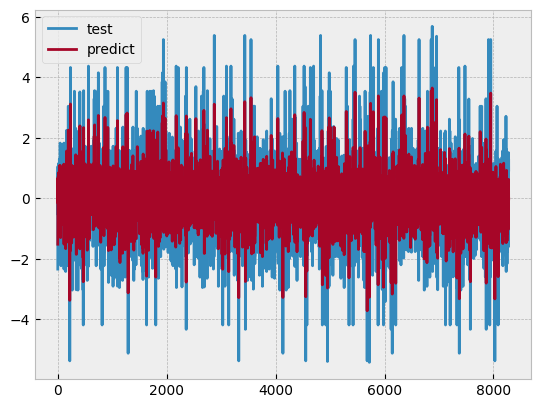

In [172]:
sns.lineplot(y_train,label='test')
sns.lineplot(y_t_pred,label='predict')

plt.show()

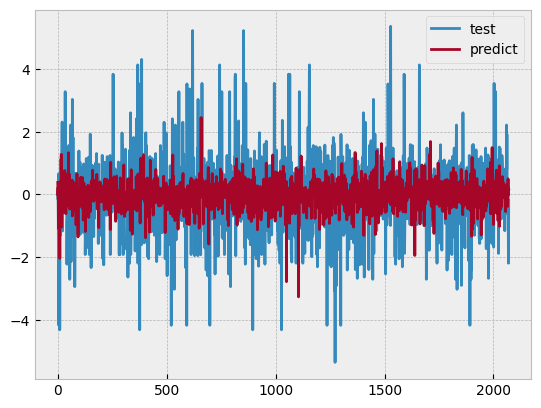

In [159]:
sns.lineplot(y_test,label='test')
sns.lineplot(y_pred,label='predict')
plt.show()

<Axes: >

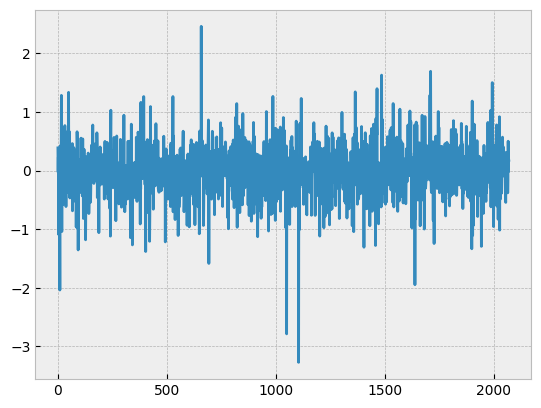